Pbm 1 - 4

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.Series(np.random.random(4), index = ['a', 'b', 'c', 'd'])

a    0.357952
b    0.433804
c    0.578156
d    0.900465
dtype: float64

In [6]:
pd.Series(np.random.random(4), name = 'uniform draws')

0    0.709983
1    0.840236
2    0.105081
3    0.428755
Name: uniform draws, dtype: float64

In [13]:
s1 = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'], name='some ints')
print(s1.values)
print(s1.name, s1.dtype, sep='  ')
print(s1.index)

[1 2 3 4]
some ints  int64
Index(['a', 'b', 'c', 'd'], dtype='object')


In [16]:
s2 = pd.Series([10, 20, 30], index=['apple', 'banana', 'carrot'])
print(s2[0])
print(s2['carrot'])
s2[0]+=1
print(s2)

10
30
apple     11
banana    20
carrot    30
dtype: int64


In [17]:
#from a dict
pd.Series({'eggplant':3, 'fig':5, 'grape':7}, name='more foods')

eggplant    3
fig         5
grape       7
Name: more foods, dtype: int64

#### Pbm 1

In [20]:
ind = np.linspace(0, 50, 51)
entries = ind**2-1
entries

array([-1.000e+00,  0.000e+00,  3.000e+00,  8.000e+00,  1.500e+01,
        2.400e+01,  3.500e+01,  4.800e+01,  6.300e+01,  8.000e+01,
        9.900e+01,  1.200e+02,  1.430e+02,  1.680e+02,  1.950e+02,
        2.240e+02,  2.550e+02,  2.880e+02,  3.230e+02,  3.600e+02,
        3.990e+02,  4.400e+02,  4.830e+02,  5.280e+02,  5.750e+02,
        6.240e+02,  6.750e+02,  7.280e+02,  7.830e+02,  8.400e+02,
        8.990e+02,  9.600e+02,  1.023e+03,  1.088e+03,  1.155e+03,
        1.224e+03,  1.295e+03,  1.368e+03,  1.443e+03,  1.520e+03,
        1.599e+03,  1.680e+03,  1.763e+03,  1.848e+03,  1.935e+03,
        2.024e+03,  2.115e+03,  2.208e+03,  2.303e+03,  2.400e+03,
        2.499e+03])

In [32]:
def filter(i):
    if i%3==0:
        return 0
    else:
        return i
pd.Series([filter(i) for i in entries], index=ind).head()

0.0   -1.0
1.0    0.0
2.0    0.0
3.0    8.0
4.0    0.0
dtype: float64

#### Pbm 2

In [117]:
def randomwalk(p = 0.5, d = 100):
    #initialize series
    date = pd.date_range('1/1/2000', '12/31/2000', freq='D')
    s=pd.Series(np.linspace(0, 0, 366), index = date)
    s[0] = d
    for i in range(1, 366):
        ran = np.random.random(1)
        if ran < p:
            s[i] = s[i-1]+1
        if ran > p:
            s[i] = s[i-1]-1
    return s

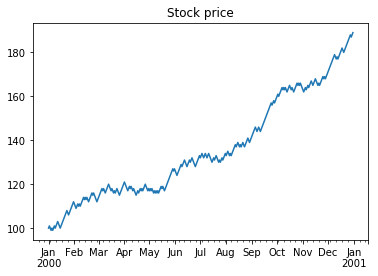

In [142]:
randomwalk(p=0.6, d = 100).plot('line')
plt.title('Stock price')
plt.show()

#### Pbm 3

In [146]:
#build toy data for SQL operations
>>> name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
>>> sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
>>> age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
>>> rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
>>> ID = range(9)
>>> aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
>>> GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
>>> mathID = [0, 1, 5, 6, 3]
>>> mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
>>> major = ['y', 'n', 'y', 'n', 'n']
>>> studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
>>> otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
>>> mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [151]:
studentInfo[(studentInfo.Age>19) & (studentInfo.Sex=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


#### Pbm 4

In [156]:
#(default) inner join
pd.merge(studentInfo, otherInfo, on='ID')[pd.merge(studentInfo, otherInfo, on='ID').Sex=='M'][['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4
